In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:/Users/Admin/Desktop/Capstone/Data/daily_forex_rates.csv')

In [18]:
data

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,351.754349,2024-08-09
1,GHS,EUR,Ghanaian Cedi,17.013113,2024-08-09
2,HRK,EUR,Croatian Kuna,7.546288,2024-08-09
3,HNL,EUR,Honduran Lempira,27.067073,2024-08-09
4,HKD,EUR,Hong Kong Dollar,8.517005,2024-08-09
...,...,...,...,...,...
370243,JPY,EUR,Japanese Yen,133.350000,2004-09-01
370244,CAD,EUR,Canadian Dollar,1.596700,2004-08-31
370245,JPY,EUR,Japanese Yen,132.850000,2004-08-31
370246,AUD,EUR,Australian Dollar,1.729600,2004-08-31


**Coverting Date to datetime**




In [6]:
data['date']= pd.to_datetime(data['date'])

In [7]:
print(f"Date Range: {data['date'].min()} to {data['date'].max()}")

Date Range: 2004-08-30 00:00:00 to 2024-08-09 00:00:00


# **Exploratory Data Analysis**

In [8]:
data.shape

(370248, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370248 entries, 0 to 370247
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   currency       370248 non-null  object        
 1   base_currency  370248 non-null  object        
 2   currency_name  369872 non-null  object        
 3   exchange_rate  370248 non-null  float64       
 4   date           370248 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 14.1+ MB


In [17]:
data.describe()

,exchange_rate,date
count,3.698720e+05,369872
mean,6.360351e+03,2019-06-03 10:21:29.596401152
min,1.497045e-05,2004-08-30 00:00:00
25%,2.534800e+00,2016-12-09 00:00:00
50%,1.709282e+01,2019-09-13 00:00:00
75%,1.499216e+02,2022-06-28 00:00:00
max,4.881841e+06,2024-08-09 00:00:00
std,1.355459e+05,NaN


In [10]:

data.isnull().sum()

currency           0
base_currency      0
currency_name    376
exchange_rate      0
date               0
dtype: int64

In [15]:
data.dropna(inplace = True)

In [16]:
data.isnull().sum()

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64

In [11]:
#Checking duplicate rows
data.duplicated().sum()

0

In [12]:
for column in ['currency', 'base_currency', 'currency_name']:
   print(f"Unique values in {column}: {data[column].nunique()}")
   print(data[column].unique())


Unique values in currency: 172
['ZWL' 'GHS' 'HRK' 'HNL' 'HKD' 'GYD' 'GTQ' 'GNF' 'GMD' 'GIP' 'GGP' 'DOP'
 'GEL' 'GBP' 'FKP' 'FJD' 'EUR' 'ETB' 'ERN' 'EGP' 'HTG' 'HUF' 'IDR' 'ILS'
 'KYD' 'KWD' 'KRW' 'KPW' 'KMF' 'KHR' 'KGS' 'KES' 'JPY' 'JOD' 'JMD' 'JEP'
 'ISK' 'IRR' 'IQD' 'INR' 'IMP' 'DZD' 'DKK' 'LAK' 'BAM' 'BOB' 'BND' 'BMD'
 'BIF' 'BHD' 'BGN' 'BDT' 'BBD' 'AZN' 'DJF' 'AWG' 'AUD' 'ARS' 'AOA' 'ANG'
 'AMD' 'ALL' 'AFN' 'BRL' 'BSD' 'BTC' 'BTN' 'CZK' 'CVE' 'CUP' 'CUC' 'CRC'
 'COP' 'CNH' 'CNY' 'CLP' 'CLF' 'CHF' 'CDF' 'CAD' 'BZD' 'BYR' 'BYN' 'BWP'
 'KZT' 'LBP' 'SDG' 'SZL' 'TWD' 'TTD' 'TRY' 'TOP' 'TND' 'TMT' 'TJS' 'THB'
 'SYP' 'UAH' 'SVC' 'STD' 'SRD' 'SOS' 'SLL' 'SLE' 'SHP' 'SGD' 'TZS' 'UGX'
 'LKR' 'XAU' 'ZMW' 'ZMK' 'ZAR' 'YER' 'XPF' 'XOF' 'XDR' 'XCD' 'XAG' 'USD'
 'XAF' 'WST' 'VUV' 'VND' 'VES' 'VEF' 'UZS' 'UYU' 'SEK' 'AED' 'SCR' 'MMK'
 'MYR' 'MXN' 'MWK' 'MVR' 'MUR' 'MRU' 'MOP' 'MNT' 'MKD' 'SBD' 'MGA' 'MDL'
 'MAD' 'LYD' 'LVL' 'LTL' 'LSL' 'LRD' 'MZN' 'NAD' 'NGN' 'NIO' 'SAR' 'RWF'
 'RUB' 'RSD' 'RON' '

**Univariate Analysis**

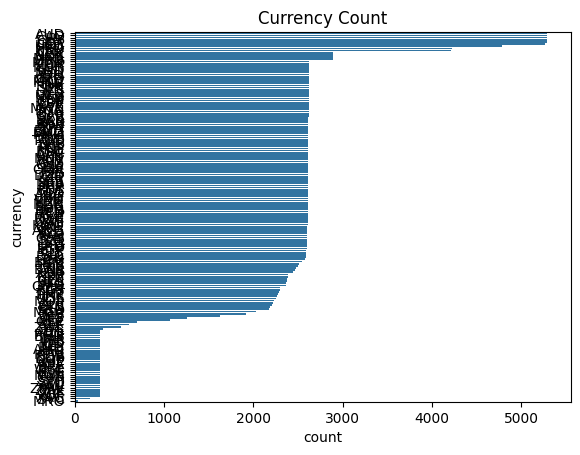

In [ ]:
sns.countplot(y = data['currency'], order = data['currency'].value_counts().index)
plt.title('Currency Count')
plt.show()

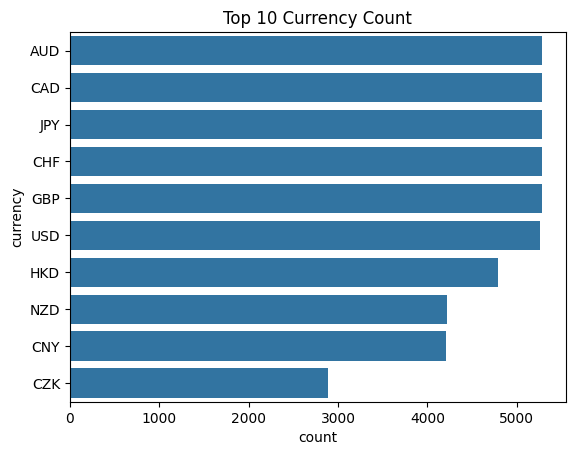

In [ ]:
top_10_currencies = data['currency'].value_counts().nlargest(10).index

# Plot the frequency of the top 10 currencies
sns.countplot(y= data['currency'], order=top_10_currencies)
plt.title('Top 10 Currency Count')
plt.show()

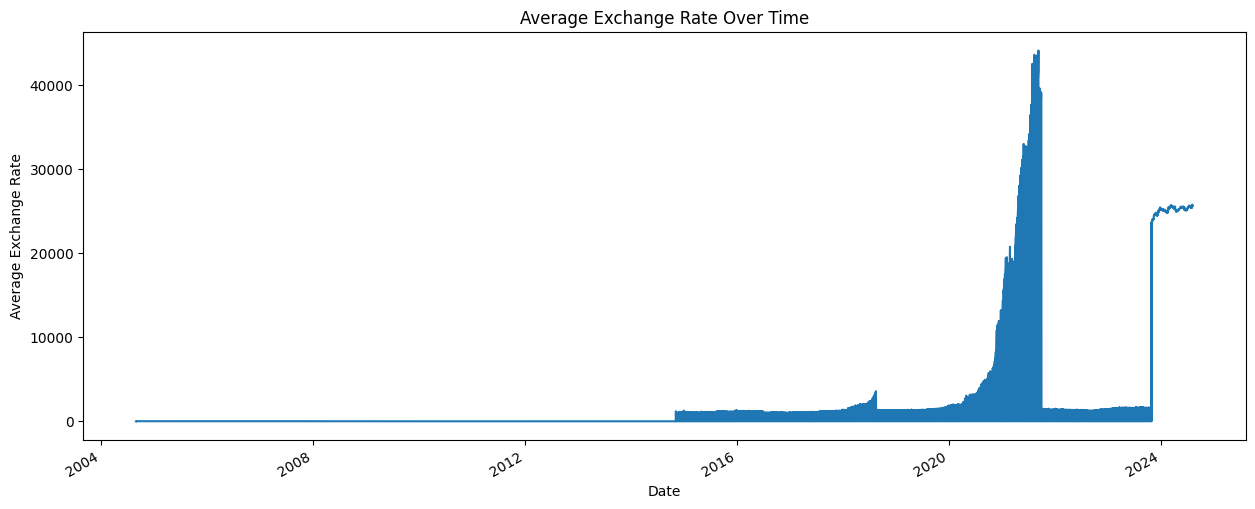

In [ ]:
data.groupby('date')['exchange_rate'].mean().plot(figsize = (15,6))
plt.title('Average Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Exchange Rate')
plt.show()

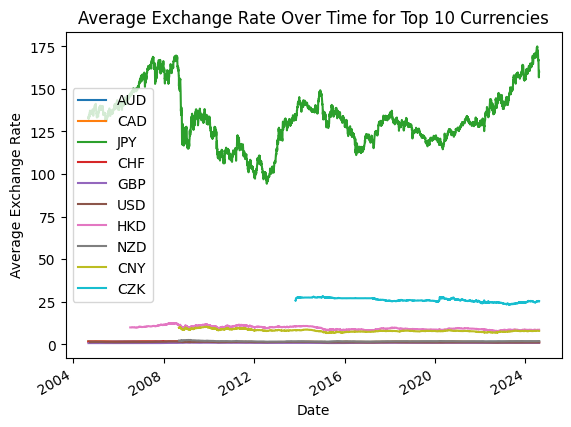

In [ ]:
#Trends for top currencies
top_10_currencies = data['currency'].value_counts().nlargest(10).index
for currency in top_10_currencies:
  data[data['currency'] == currency].groupby('date')['exchange_rate'].mean().plot(label = currency)
plt.title('Average Exchange Rate Over Time for Top 10 Currencies')
plt.xlabel('Date')
plt.ylabel('Average Exchange Rate')
plt.legend()

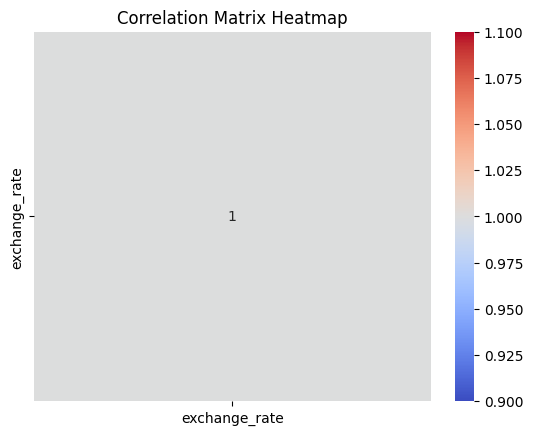

In [ ]:

numerical_data = data.select_dtypes(include=['number'])


corr_matrix = numerical_data.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

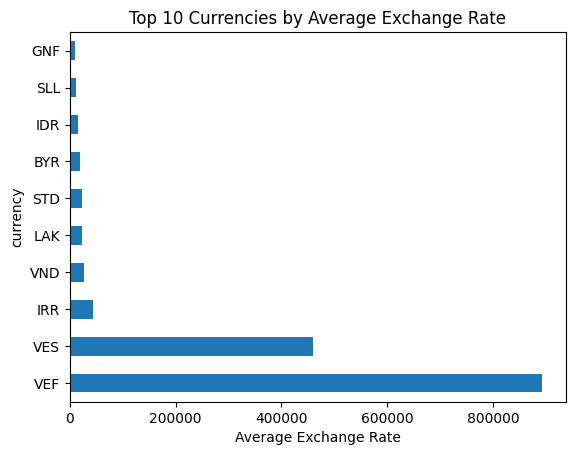

In [ ]:
mean_exchange_rate_by_currency = data.groupby('currency')['exchange_rate'].mean()

# Plotting
mean_exchange_rate_by_currency.nlargest(10).plot(kind='barh')
plt.title('Top 10 Currencies by Average Exchange Rate')
plt.xlabel('Average Exchange Rate')
plt.show()

**Boxplot Analysis**

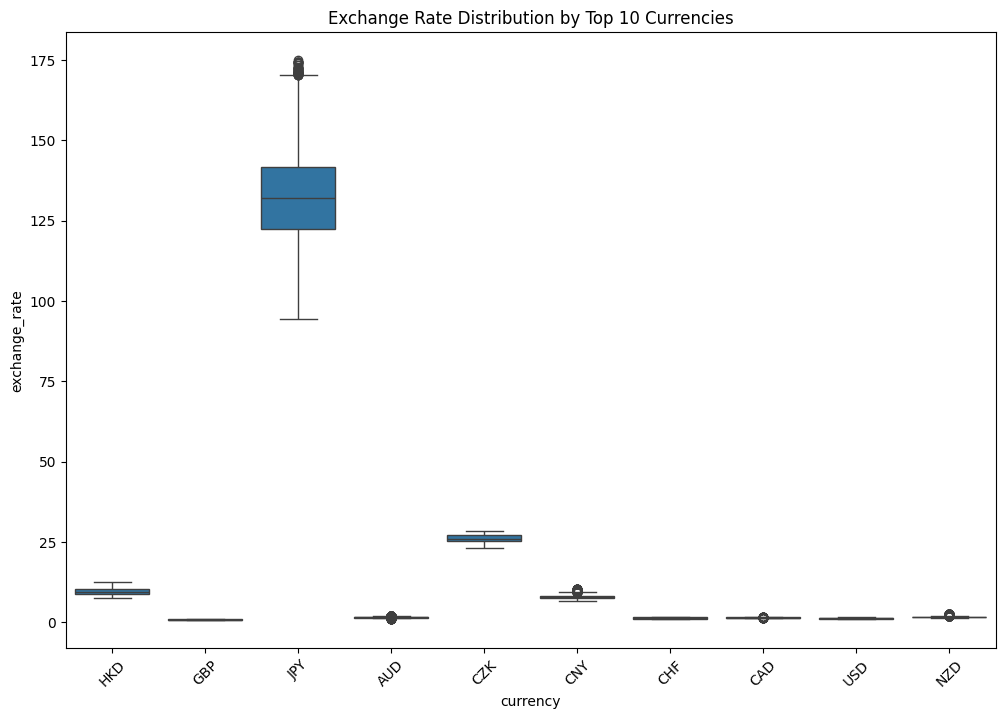

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='currency', y='exchange_rate', data=data[data['currency'].isin(top_10_currencies)]) # Remove .index
plt.title('Exchange Rate Distribution by Top 10 Currencies')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Exchange Rate')

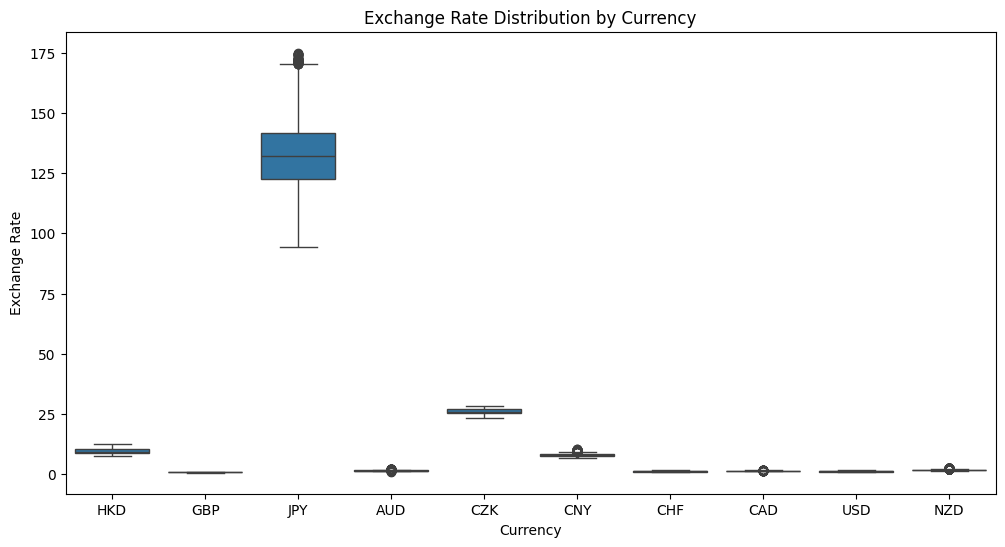

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'currency', y = 'exchange_rate', data = data[data['currency'].isin(top_10_currencies)])
plt.title('Exchange Rate Distribution by Currency')
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')

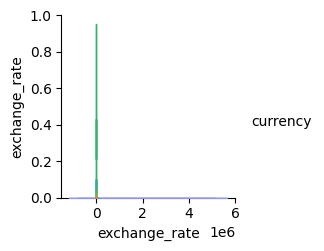

In [ ]:
sns.pairplot(data, hue='currency')
plt.show()

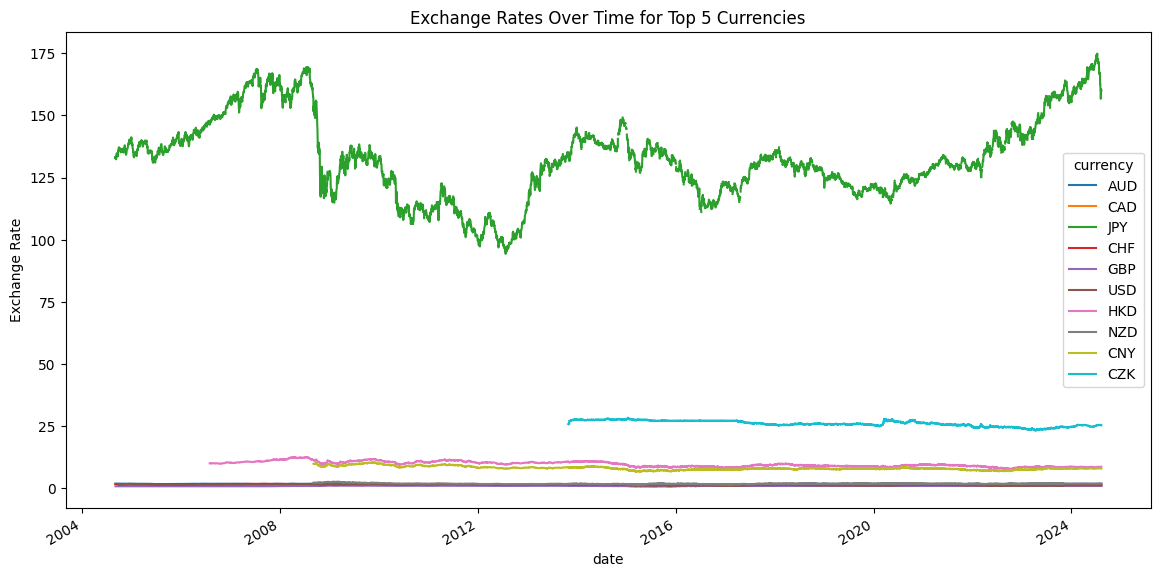

In [ ]:
pivot_data = data.pivot(index = 'date', columns = 'currency', values = 'exchange_rate')
pivot_data[top_10_currencies].plot(figsize=(14, 7))
plt.title('Exchange Rates Over Time for Top 5 Currencies')
plt.ylabel('Exchange Rate')
plt.show()

# **Preprocessing the Data**

**Handling Categorical Variables**

In [ ]:
data_encoded = pd.get_dummies(data, columns = ['currency', 'base_currency', 'currency_name'],drop_first = True)

**Convert the Date to Numerical Features**

In [ ]:
data_encoded['date'] = pd.to_datetime(data_encoded['date'])

In [ ]:
data_encoded['year'] = data_encoded['date'].dt.year
data_encoded['month'] = data_encoded['date'].dt.month
data_encoded['day'] = data_encoded['date'].dt.day

In [ ]:

data_encoded = data_encoded.drop(columns=['date'])

NameError: name 'data_encoded' is not defined

# **Splitting The Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_encoded.drop(columns=['exchange_rate'])
y = data_encoded['exchange_rate']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Building a Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluating the Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict the exchange rates using the test data
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


Mean Absolute Error (MAE): 37.392885205488426
Mean Squared Error (MSE): 1746964.739426235
Root Mean Squared Error (RMSE): 1321.7279369924186
R-squared (R²) Score: 0.9999119379188949


# **Code to Compare Actual vs Predicted Exchange Rates**

In [ ]:
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(comparison_df.head())

NameError: name 'model' is not defined

In [ ]:
# Plotting Actual vs Predicted Exchange Rates
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='blue')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()
